# CDF(Cumulative Distribution Function)

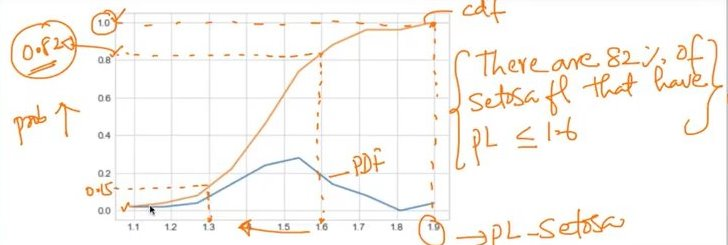

Through PDF(probability distribution function) its some what hard to see what is the percentage of setosa flowers with length <= 1.6, as it is a bell curve.<br>

But through CDF(orange curve in the above graph) its easy to get the percentage of flowers of PL<=1.6.


CDF = Integration or CumulativeSum of PDF.(As in gthe below Image) 

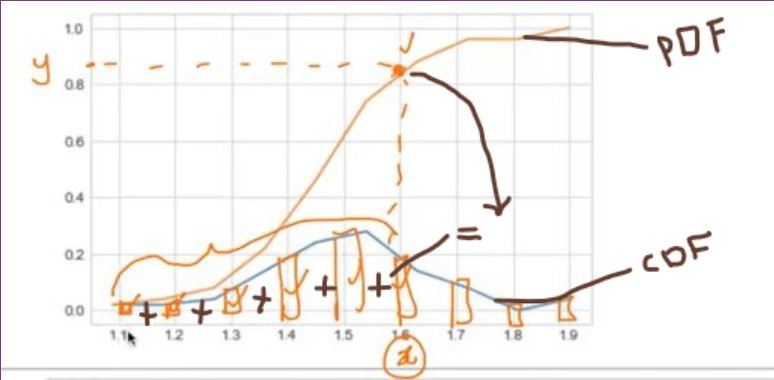

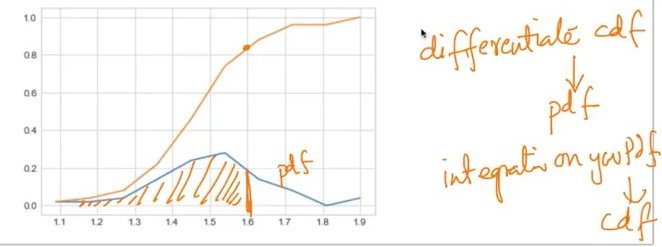

Area under the curve is equal to the cdf

# Understanding np.histogram() and bins concepts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

counts, bin_edges = np.histogram([1, 2, 1], bins=[0, 1, 2, 3])
print(counts,bin_edges);

plt.plot(bin_edges[1:],counts);
plt.xlabel('bin size 1 - 3');
plt.ylabel('Counts inputs[1,2,1] in the intervals of bins')
plt.show();

[0 2 1] [0 1 2 3]


Explanation: first parameter in np.histogram() fn is Input values[1,2,1] and second param is 'bins'.
<br>

Here Bins is nothing but the intervals --> 0-1 1-2 2-3 <br>

Our inputs are 1,2,1 i.e the are 2 occurances of 1 in the input i.e in the interval 1-2 there are 2 values and in the interval 2-3 there is one occurance of 2 according to input so value is 1.<br>

output: This function returns 2 values as output <br>
1) count<br>
2) bin_edges<br>
<br>
output:<br>
Interval      Count<br>
0-1      ->   0<br>
1-2      ->   2<br>
2-3      ->   1<br>

# Back To Flowers Example               

In [2]:
iris = pd.read_csv('iris.csv');

In [3]:
iris_setosa = iris['petal_length'][iris['species']=='setosa']

In [4]:
counts, bin_edges = np.histogram(iris_setosa,bins=10,density=True)

print(counts,bin_edges);
bin_edges[1:]

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444] [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


array([1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

In [35]:
pdf= counts/(sum(counts))
print(pdf)


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


Observation: sum of all this values is 100 i.e 100%

In [36]:
#computing CDF
cdf = np.cumsum(pdf) #calc's Cumulative sum like compounding.
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 0.96, 1.  ])

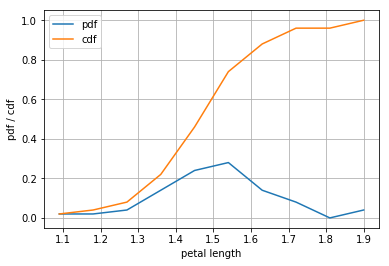

In [37]:
plt.xlabel('petal length')
plt.ylabel('pdf / cdf')
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='cdf');
plt.legend()
plt.grid()
plt.show()